In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numba as nb
import time
import pandas as pd
import seaborn as sns
from numba import types
from numba.typed import Dict
from utils import *
from simulate import *
from plot import *

In [2]:
from numba.typed import Dict
weight_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
neurons_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
stim_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
flag_dict = Dict.empty(key_type=types.unicode_type, value_type=types.int64,)
rates_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
eta_dict = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
fixed_inp = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)
stim_params = Dict.empty(key_type=types.unicode_type, value_type=types.float64,)

rates = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:,:] )
weights = Dict.empty(key_type=types.unicode_type, value_type=types.float64[:])

weight_dict['wed']  = 1.5
weight_dict['wpe']  = 1.5
weight_dict['wpp']  = 0.5
weight_dict['wse']  = 1
weight_dict['wve']  = 1
weight_dict['wde']  = 1.5
weight_dict['wsv']  = 0.6
weight_dict['wvs']  = 0.5
weight_dict['wep']  = 3.19
weight_dict['wpv']  = 0.1312
weight_dict['wps']  = 0.7656
weight_dict['wds']  = 1.49


o_wep = 3.19
o_wpv = 0.13124999999999998 
o_wps = 0.765625 
o_wds = 1.49

stim = 3.5


rates_dict['re'] = 1.0
rates_dict['rd'] = 0.0
rates_dict['rp'] = 2.0
rates_dict['rs'] = 2.0
rates_dict['rv'] = 4.0

xE = rates_dict['re'] - weight_dict['wed'] * rates_dict['rd'] + o_wep * rates_dict['rp'] 
xD = 0
xP = rates_dict['rp']  * (1.0 + weight_dict['wpp']) - weight_dict['wpe'] * rates_dict['re'] + o_wps * rates_dict['rs'] + o_wpv * rates_dict['rv']
xS = rates_dict['rs'] - weight_dict['wse'] * rates_dict['re'] + weight_dict['wsv'] * rates_dict['rv'] 
xV = rates_dict['rv'] - weight_dict['wve'] * rates_dict['re'] + weight_dict['wvs'] * rates_dict['rs'] 

print(xE, xD, xP, xS, xV)

neurons_dict['Ne']  = 70
neurons_dict['Ni']  = 10

stim_dict['Ve']     = 1
stim_dict['Vp']     = 0
stim_dict['Mp']     = 1
stim_dict['Vs']     = 0
stim_dict['Ms']     = 1
stim_dict['Vv']     = 1
stim_dict['Mv']     = 0
stim_dict['Md']     = 1

stim_params['stim_value'] = stim
stim_params['stim_dur'] = 7 # test stimulus
stim_params['no_vis_stim'] = 1

fixed_inp['xe'] = xE
fixed_inp['xd'] = xD
fixed_inp['xp'] = xP
fixed_inp['xs'] = xS
fixed_inp['xv'] = xV

eta_dict['η1'] = 1e-6
eta_dict['η2'] = 1e-6
eta_dict['η3'] = 1e-7
eta_dict['η4'] = 1e-7

flag_dict['test'] = 1
flag_dict['opto_gen'] = 0
flag_dict['neuron_flag'] = 0
flag_dict['opto_val'] = 0


7.38 0 3.55625 3.4 4.0


C:\Users\SREE\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\SREE\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


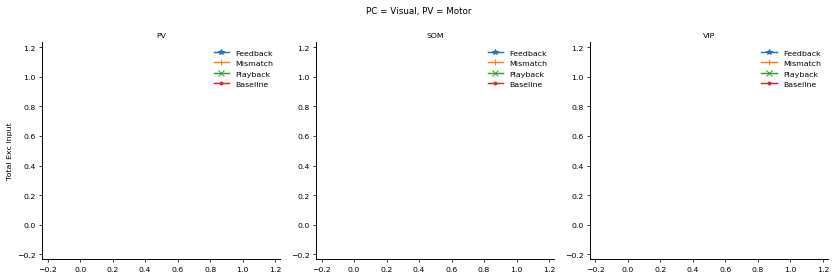

In [3]:
opt_vals = np.arange(-10,11,1)
neuron_flags = [0,1,2]
x = 10000
op_array = np.zeros((4,len(neuron_flags),len(opt_vals)))
for i in range(len(opt_vals)):
    test=True
    opto_gen = True
    opto_val = opt_vals[i]
    flag_dict['opto_val'] = opto_val
    for j in range(len(neuron_flags)):        
        rates,weights = Simulate(weight_dict, neurons_dict, rates_dict, stim_dict, eta_dict, flag_dict, stim_params, fixed_inp, rates, weights)
        I_e = rates['Ie']
        Ie = np.mean(I_e,axis=1)
        fb_mean = np.mean(Ie[x:2*x])
        mm_mean = np.mean(Ie[3*x:4*x])
        pb_mean = np.mean(Ie[5*x:6*x])
        bl_mean = (np.mean(Ie[0:x])+np.mean(Ie[2*x:3*x])+np.mean(Ie[4*x:5*x])+np.mean(Ie[6*x:7*x]))/4
        
        op_array[0][j][i] = fb_mean
        op_array[1][j][i] = mm_mean
        op_array[2][j][i] = pb_mean
        op_array[3][j][i] = bl_mean
    
neurons = ["PV","SOM","VIP"]
fig,axs = plt.subplots(1,3,figsize=(12,4),dpi=70)
for i in range(len(axs)):
    
    axs[i].set_title('%s'%(neurons[i]))
    axs[i].plot(opt_vals,op_array[0,i],label="Feedback",marker="*")
    axs[i].plot(opt_vals,op_array[1,i],label="Mismatch",marker="+")
    axs[i].plot(opt_vals,op_array[2,i],label="Playback",marker="x")
    axs[i].plot(opt_vals,op_array[3,i],label="Baseline",marker=".")
    axs[i].legend(loc="best",frameon=False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
axs[0].set_ylabel("Total Exc input")      
fig.suptitle("PC = Visual, PV = Motor")
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()